# Predicting Countries GDP


### Author : Jose Juan Peña Gomez

## Introduction

I was looking for various economic indicators, statistics of countries and I came across UNData Kaggle's dataset provided by Data Science for Good : Kiva Crowdfunding.

The United Nations Statistics Division (UNSD) of the Department of Economic and Social Affairs (DESA) launched a new internet based data service for the global user community. It brings UN statistical databases within easy reach of users through a single entry point (http://data.un.org/). Users can search and download a variety of statistical resources of the UN system.

    https://www.kaggle.com/sudalairajkumar/undata-country-profiles

This dataset contains the following key statistical indicators of the countries:

    1- General Information
    2- Economic Indicators
    3- Social Indicators
    4- Environmental & Infrastructure Indicators

The data is from 2017.

This dataset is composed by two files:

    1. Country_profile_variables.csv : contains the indicator variables of all the countries present in UNData.
    2. kiva_country_profile_variables.csv : contains the indicator variables of the countries present in the Kiva Crowdfunding dataset. (Apart from country Kosovo, all the other countries are present in UNData and hence it is in this dataset as well)
    
So finally I decided that the porpuse of this project is going to be about  building a machine learning model which will be able to predict the GDP of every country.

And as you tell me, and as I will explain you later I will use some data from The World Factbook of the Cia to set up the dataframe.
        https://www.cia.gov/library/publications/download/

# Set up the project libraries

In this project we are going to use several tools as Numpy for mathematicals issues, Pandas for arrange the data, sklearn for the ML part and matplotlib for plotting the results.

In [32]:
# Import Section

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import GridSearchCV


import seaborn as sns

Input data files are available in the "../input/" directory.

In [33]:
print(os.listdir("input/"))

['kiva_country_profile_variables.csv', 'country_profile_variables.csv']


# Get the data

For getting the data is necesary to first download the dataset from the webpage written before ( Kaggle ). Then I will set the variable df for work with a dataframe of the dataset for take a look.

In [34]:
df = pd.read_csv('input/country_profile_variables.csv')

# Explore the data

We can take a first look of the first rows of the dataframe with the function head.

We can observe that each row is a country and each country has 50 features that in this case mean 50 economics indicators.

In [35]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


We can observe that there is not data null.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
country                                                       229 non-null object
Region                                                        229 non-null object
Surface area (km2)                                            229 non-null object
Population in thousands (2017)                                229 non-null int64
Population density (per km2, 2017)                            229 non-null float64
Sex ratio (m per 100 f, 2017)                                 229 non-null float64
GDP: Gross domestic product (million current US$)             229 non-null int64
GDP growth rate (annual %, const. 2005 prices)                229 non-null object
GDP per capita (current US$)                                  229 non-null float64
Economy: Agriculture (% of GVA)                               229 non-null object
Economy: Industry (% of GVA)                                  229 non-null

As we can see here that there is a colummn about GDP, but I am going to work with it later.

In [37]:
df[['country','GDP per capita (current US$)']]

,country,GDP per capita (current US$)
0,Afghanistan,623.2
1,Albania,3984.2
2,Algeria,4154.1
3,American Samoa,-99.0
4,Andorra,39896.4
5,Angola,4714.1
6,Anguilla,21879.6
7,Antigua and Barbuda,14764.5
8,Argentina,14564.5
9,Armenia,3489.1


Several histograms, in which are represented a cluster of the total amount of attributes for visualizing purposes and doing a small previous analysis of the dataset.

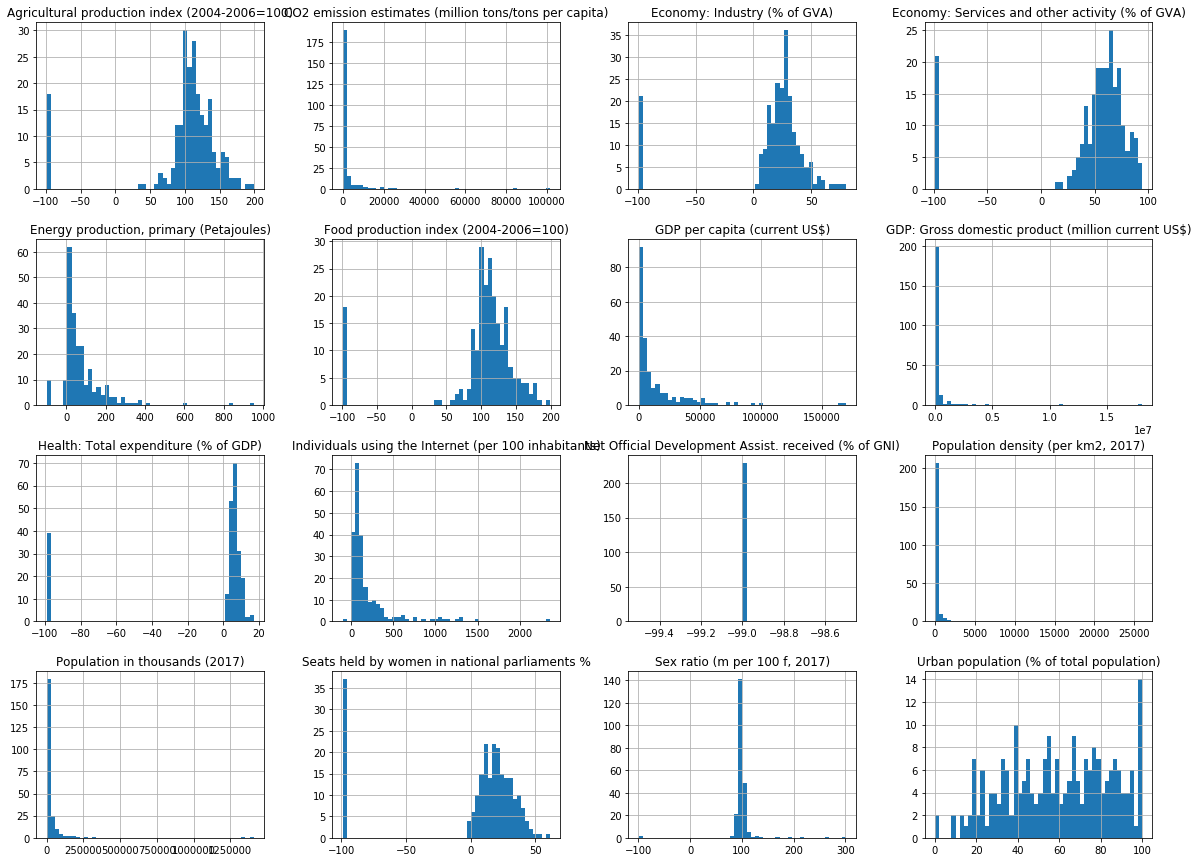

In [38]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

# Preparing the Dataset

Because it's necessary to have proportional amounts of data per frequency bar (Because if we take care of the analysis of the histograms above, we can realize that there are some that are disproportionate, therefore I am going to put manually data from The World FactBook of the CIA because the file provided by the CIA is very huge and take so much time to merge with the dataframe or even prepare it for be a datafram.

So I took some values that are missing or wrong and I put them in the dataset that I am working right now with an script generating another dataset from the original one. Then, I will continue working with the new one.

In [59]:
df = pd.read_csv('input/DataSet_V2.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 51 columns):
Unnamed: 0                                                    219 non-null int64
country                                                       219 non-null object
Region                                                        219 non-null object
Surface area (km2)                                            219 non-null int64
Population in thousands (2017)                                219 non-null int64
Population density (per km2, 2017)                            219 non-null float64
Sex ratio (m per 100 f, 2017)                                 219 non-null float64
GDP: Gross domestic product (million current US$)             219 non-null int64
GDP growth rate (annual %, const. 2005 prices)                219 non-null float64
GDP per capita (current US$)                                  219 non-null float64
Economy: Agriculture (% of GVA)                               219 non-null 

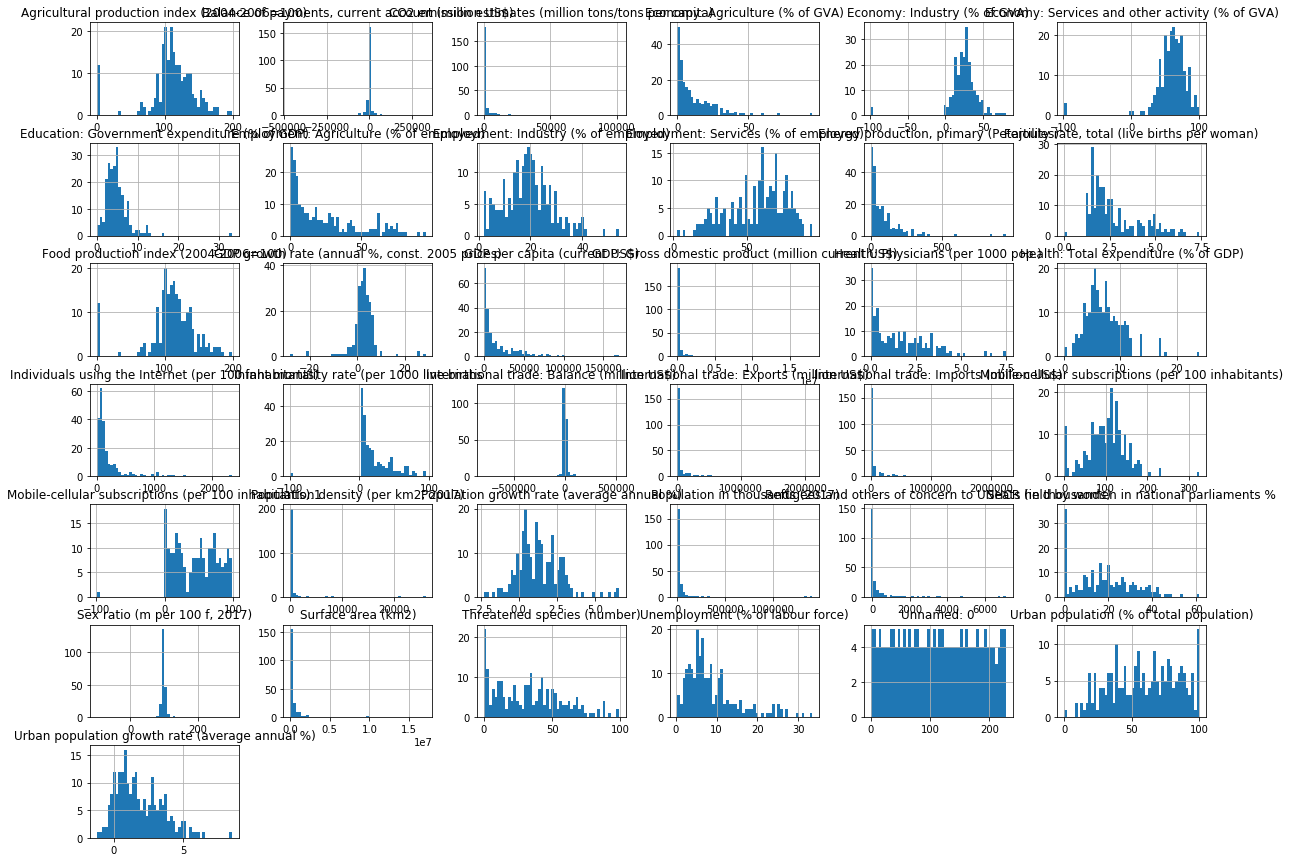

In [57]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

So as we can appreciate the data is getting less disprorpocionate, but still is not enought.

There are features with almost no data like the last columns, so I will drop them.

In [60]:
df.drop(df.columns[-3:], axis=1, inplace=True)
df.drop(columns=['Forested area (% of land area)'], inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


There is a categorical variable in the data set, "Region", let's transforme it for make easier the proccessing of the data.

In [61]:
region = pd.get_dummies(df['Region'])
region.head()

,Caribbean,CentralAmerica,CentralAsia,EasternAfrica,EasternAsia,EasternEurope,Melanesia,Micronesia,MiddleAfrica,NorthernAfrica,...,Oceania,Polynesia,South-easternAsia,SouthAmerica,SouthernAfrica,SouthernAsia,SouthernEurope,WesternAfrica,WesternAsia,WesternEurope
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now let drop the original column and concatenate the two data frames into one.

In [62]:
df.drop(columns=['Region'], inplace=True)

In [63]:
df = pd.concat([df,region], axis=1)
df.head()

,Unnamed: 0,country,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Oceania,Polynesia,South-easternAsia,SouthAmerica,SouthernAfrica,SouthernAsia,SouthernEurope,WesternAfrica,WesternAsia,WesternEurope
0,0,Afghanistan,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,0,0,0,0,0,1,0,0,0,0
1,1,Albania,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,0,0,0,0,0,0,1,0,0,0
2,2,Algeria,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,0,0,0,0,0,0,0,0,0,0
3,3,American Samoa,199,56,278.2,103.6,658,-2.5,11200.0,27.4,...,0,1,0,0,0,0,0,0,0,0
4,4,Andorra,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,0,0,0,0,0,0,1,0,0,0


Now I will change the features that are splited in two but in the same features, like the following ones. 

In [64]:
df[['country','Life expectancy at birth (females/males, years)']].head()

,country,"Life expectancy at birth (females/males, years)"
0,Afghanistan,63.5/61.0
1,Albania,79.9/75.6
2,Algeria,76.5/74.1
3,American Samoa,77.8/71.1
4,Andorra,80.7/85.2


To do that I will split the feature into two.

In [65]:
life_exp = df['Life expectancy at birth (females/males, years)']
life_exp = life_exp.str.split("/", expand=True)
life_exp.columns = ['Life exp. Male','Life exp. Female']
life_exp.head()

,Life exp. Male,Life exp. Female
0,63.5,61.0
1,79.9,75.6
2,76.5,74.1
3,77.8,71.1
4,80.7,85.2


Then I will do the same with the rest of the features with this problem.

Please read about the terms of use and policies here.